# Temperature européenne

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Functions for mapping
import plotly.express as px
import plotly.graph_objects as go 

import dash
from dash import dcc
from dash import html 

In [2]:
# Load the data: food
temperature = pd.read_csv("temperat.csv",sep=";", index_col=0)
temperature

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,-6.1,Nord
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est


In [3]:
months = temperature.columns[:12]
monthly = temperature.iloc[:,:12]
monthly

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6
Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7


## Carte affichant les villes. 
Cette carte montre bien la variation de la moyenne des températures selon la localisation de la ville

In [4]:
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

# Source of data 
external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
                "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]

# Build App
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
fig1 = px.scatter_mapbox(temperature, lat='Latitude', lon='Longitude', color='Moyenne', hover_name=temperature.index, zoom=2,
                             mapbox_style="open-street-map", range_color=[2, 20])

app.layout = html.Div([
            html.H1(children = f'Repartition temperature la localisation', style={'textAlign': 'center', 'color':'blue'}),
            dcc.Graph(id='HeatMap',figure=fig1),    
        ])

# Run app and display result inline in the notebook
app.run_server(mode='inline', port=2020)

In [5]:
# Source of data 

# Build App
app = JupyterDash(__name__)

fig2 = px.scatter(temperature, x="Moyenne", y="Amplitude", color="Region", hover_name=temperature.index)

app.layout = html.Div([
html.H1(children = f'Amplitude des températures selon la moyenne des températures par région', style={'textAlign': 'center', 'color':'blue'}),
            dcc.Graph(id='Scatter',figure=fig2),
    ])

# Run app and display result inline in the notebook
app.run_server(mode='inline', port=2021)

Erreurs dans la localisation de certaines villes.
Ces coordonnées ont été corrigées pour pouvoir avoir des résultats plus justes. 

In [6]:
months = temperature.columns[1:13]

In [7]:
temperature.describe() # Statistical summary of the data

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,49.022857,10.205714
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.084950,12.640108
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.200000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,2.200000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.000000


In [8]:
monthly = temperature.iloc[:,:12]
average = temperature.iloc[:,12]
amplitude = temperature.iloc[:,13]
coordonnees = temperature.iloc[:,14:16]

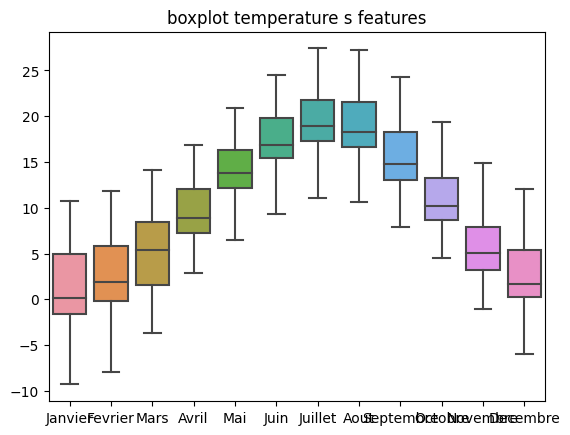

In [9]:
# Boxplot for temperature
plt.figure()
plt.title('boxplot temperature s features')
temperature_box=sns.boxplot(data=monthly,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.show()

In [10]:
dummy_temperature = pd.get_dummies(temperature["Region"])
temp = pd.concat([temperature, dummy_temperature], axis=1)
temp = temp.drop("Region", axis=1)
temp

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Est,Nord,Ouest,Sud
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,0,0,1,0
Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,0,0,0,1
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,0,0,1,0
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,0,0,1,0
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,1,0,0,0
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,0,1,0,0
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,-6.1,0,1,0,0
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,0,1,0,0
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,1,0,0,0
Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,1,0,0,0


In [11]:
region = temp.iloc[:,16:]
my_temp = pd.concat([average, amplitude,region],axis =1)
my_temp

,Moyenne,Amplitude,Est,Nord,Ouest,Sud
Amsterdam,9.9,14.6,0,0,1,0
Athenes,17.8,18.3,0,0,0,1
Berlin,9.1,18.5,0,0,1,0
Bruxelles,10.3,14.4,0,0,1,0
Budapest,10.9,23.1,1,0,0,0
Copenhague,7.8,17.5,0,1,0,0
Dublin,9.3,10.2,0,1,0,0
Helsinki,4.8,23.4,0,1,0,0
Kiev,7.1,25.3,1,0,0,0
Cracovie,7.7,22.1,1,0,0,0


In [12]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n, n_init=10).fit(my_temp) # Clustering with the given number of clusters
    cluster_labels = kmeans_temp.labels_ # Extract the labels
    silhouette_avg = silhouette_score(my_temp, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.4414293313186536
For n = 3 Silhouette_score: 0.45082997323715396
For n = 4 Silhouette_score: 0.44818061789695013
For n = 5 Silhouette_score: 0.4284106107456987
For n = 6 Silhouette_score: 0.43694053671083655
For n = 7 Silhouette_score: 0.4439997855535712
For n = 8 Silhouette_score: 0.3949053851992707
For n = 9 Silhouette_score: 0.3924207087465366
For n = 10 Silhouette_score: 0.37249349165562906


In [13]:
kmeans_multiple = KMeans(n_clusters=3,n_init=40,init='random').fit(my_temp)
centers=kmeans_multiple.cluster_centers_

# We also represent the data in 2D-space with colors corresponding to cluster

# Source of data 
kmeans_multiple.labels_
print(kmeans_multiple.labels_)
# Build App
app = JupyterDash(__name__)

fig2 = px.scatter(my_temp, x="Amplitude", y="Moyenne", color=kmeans_multiple.labels_, hover_name=temperature.index)

app.layout = html.Div([
html.H1(children = f'Amplitude des températures selon la moyenne des températures par région', style={'textAlign': 'center', 'color':'blue'}),
            dcc.Graph(id='Scatter',figure=fig2),
    ])

# Run app and display result inline in the notebook
app.run_server(mode='inline', port=2022)

[2 1 0 2 0 2 2 0 0 0 1 2 1 0 0 0 2 0 2 1 0 0 0 2 1 2 2 0 0 1 0 1 1 0 0]


In [14]:
kmeans_multiple = KMeans(n_clusters=3,n_init=40,init='random').fit(my_temp)
centers=kmeans_multiple.cluster_centers_

# We also represent the data in 2D-space with colors corresponding to cluster


external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
                "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]

# Build App
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
fig1 = px.scatter_mapbox(temperature, lat='Latitude', lon='Longitude', color=kmeans_multiple.labels_, hover_name=temperature.index, zoom=2,
                             mapbox_style="open-street-map", range_color=[0, 3])

app.layout = html.Div([
            html.H1(children = f'Repartition temperature la localisation', style={'textAlign': 'center', 'color':'blue'}),
            dcc.Graph(id='HeatMap',figure=fig1),    
        ])

# Run app and display result inline in the notebook
app.run_server(mode='inline', port=2023)



In [15]:
# We now perform hierarchical clustering. 

# We standardize the columns of interest
temp_scaled=pd.DataFrame(scale(my_temp),columns=my_temp.columns,index=my_temp.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
# print(food_scaled)

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(temp_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[ 2.         34.          0.11187146  2.        ]
 [ 0.          3.          0.11187146  2.        ]
 [27.         28.          0.11546589  2.        ]
 [15.         22.          0.12368778  2.        ]
 [23.         36.          0.14282235  3.        ]
 [24.         29.          0.18195713  2.        ]
 [17.         21.          0.268036    2.        ]
 [14.         33.          0.27258634  2.        ]
 [35.         37.          0.33947987  4.        ]
 [16.         39.          0.36808633  4.        ]
 [31.         40.          0.41209214  3.        ]
 [ 6.         26.          0.44198989  2.        ]
 [ 8.         13.          0.4674381   2.        ]
 [ 1.         32.          0.52794975  2.        ]
 [ 9.         41.          0.55998051  3.        ]
 [12.         19.          0.66298484  2.        ]
 [ 7.         38.          0.69037507  3.        ]
 [11.         46.          0.70238971  3.        ]
 [25.         44.          0.73675915  5.        ]
 [ 4.         49.          0.78

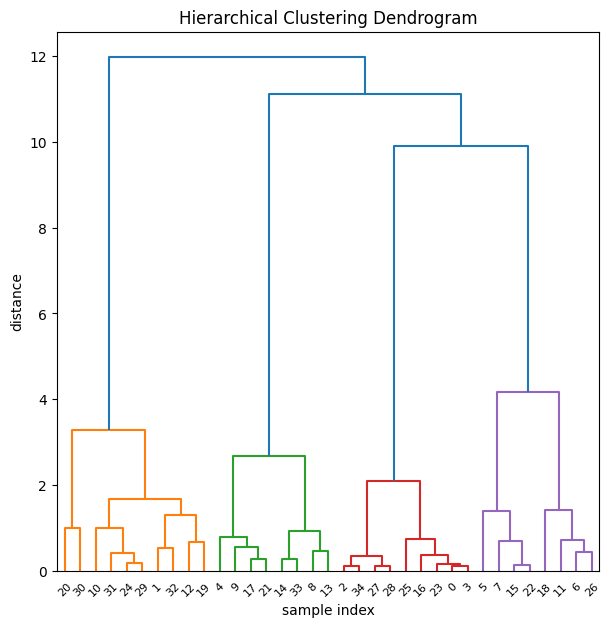

In [16]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(temp_scaled, 'ward')
)
plt.show()

In [17]:
metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None

for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(temp_scaled,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(temp_scaled,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            else:
                max_val=max_val
            print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist,')')

( single , euclidean , euclidean ) : 0.9260290061691986
( single , euclidean , minkowski ) : 0.9260290061691986
( single , euclidean , cityblock ) : 0.9076711888997997
( single , euclidean , cosine ) : 0.9431866537512678
( complete , euclidean , euclidean ) : 0.9205597399809122
( complete , euclidean , minkowski ) : 0.9205597399809122
( complete , euclidean , cityblock ) : 0.8916342678265264
( complete , euclidean , cosine ) : 0.89107952572217
( average , euclidean , euclidean ) : 0.9419590369599997
( average , euclidean , minkowski ) : 0.9419590369599997
( average , euclidean , cityblock ) : 0.913223592810221
( average , euclidean , cosine ) : 0.9338109932422122
( single , hamming , euclidean ) : 0.792001829808034
( single , hamming , minkowski ) : 0.792001829808034
( single , hamming , cityblock ) : 0.7856973166297426
( single , hamming , cosine ) : 0.7788560297141485
( complete , hamming , euclidean ) : 0.9078158987646279
( complete , hamming , minkowski ) : 0.9078158987646279
( com

# SVD 